In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

In [2]:
privacy = pd.read_csv("data/data_privacy_tweets.csv")

In [3]:
privacy.shape

(10803, 90)

In [4]:
privacy.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1166589525386301440,x1404485195676459008,2021-06-14 17:05:39,privacy_issues,The @EFF finds that the proposed modifications...,TweetDeck,248,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
1,x1166589525386301440,x1403010409473449986,2021-06-10 15:25:22,privacy_issues,The European Parliament passes the new #EU #CO...,TweetDeck,223,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
2,x1166589525386301440,x1404185087093182465,2021-06-13 21:13:07,privacy_issues,To gain better control over the increasingly p...,TweetDeck,240,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
3,x1166589525386301440,x1401833811940306947,2021-06-07 09:30:00,privacy_issues,What if the consumers are on the driving seat ...,TweetDeck,255,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
4,x1166589525386301440,x1401555697163280387,2021-06-06 15:04:52,privacy_issues,"""Vera Jourová says new rules are needed to lim...",TweetDeck,230,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...


In [5]:
#Check missing values
privacy.isna().sum()/privacy.shape[0] 

user_id                   0.000000
status_id                 0.000000
created_at                0.000000
screen_name               0.000000
text                      0.000000
                            ...   
profile_expanded_url      0.301861
account_lang              1.000000
profile_banner_url        0.133481
profile_background_url    0.277423
profile_image_url         0.000000
Length: 90, dtype: float64

In [6]:
#Not sure how to drop over 80 columns at one time so keep text instead.
df = privacy[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [7]:
df.head()

,text,is_quote,is_retweet,retweet_count,hashtags,followers_count
0,The @EFF finds that the proposed modifications...,False,False,0,COVID,406
1,The European Parliament passes the new #EU #CO...,False,False,0,EU COVID19 GDPR,406
2,To gain better control over the increasingly p...,False,False,0,China datasharing datasecurity,406
3,What if the consumers are on the driving seat ...,False,False,1,privacypolicy tech DataPrivacy innovation Priv...,406
4,"""Vera Jourová says new rules are needed to lim...",False,False,1,EU US,406


In [8]:
import nltk as nl
!pip install textblob
!python -m textblob.download_corpora

Finished.

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to


[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


0    The  finds that the proposed modifications to ...
1    The European Parliament passes the new #EU #CO...
2    To gain better control over the increasingly p...
3    What if the consumers are on the driving seat ...
4    "Vera Jourová says new rules are needed to lim...
Name: text, dtype: object

In [10]:
text = df[["text"]]
pd.set_option('display.max_colwidth', -1)
text

,text
0,"The @EFF finds that the proposed modifications to the HIPAA would ""invade your most personal and intimiate health data."" \r\n\r\nStating that trust in healthcare is crucial and especially so during the #COVID pandemic.\r\n\r\nRead more: https://t.co/ReuoQ3mF9p"
1,The European Parliament passes the new #EU #COVID19 Certificate Regulation detailing peoples' COVID information.\r\n\r\nPromising that all personal data will be processed in line with the #GDPR\r\n\r\nRead more: https://t.co/8PGuChsV5F
2,"To gain better control over the increasingly powerful technology sector in #China, new regulations in China make it harder for big tech to refuse the government's request for #datasharing. \r\n\r\n#datasecurity\r\n\r\nRead more: https://t.co/piSfs3NW4J"
3,What if the consumers are on the driving seat to agree or disagree to the #privacypolicy of the #tech giants? Article by Beth Magnuson\r\nexplains #DataPrivacy &amp; #innovation on @VentureBeat \r\n\r\nhttps://t.co/n2pFOwWSmi\r\n\r\n#PrivacyTech #Technology #DataPrivacy
4,"""Vera Jourová says new rules are needed to limit the bulk collection of Europeans’ data.""\r\n\r\nThe #EU is requiring new legislation limiting #US government agencies from accessing European data. \r\n\r\nRead more at: https://t.co/04avhPjhCd"
...,...
10798,@stacc @DrLindaDykes @NHSDigital For unknown (to me) reasons the Data Privacy Impact Assessment is not published yet. I suspect it will be similar to this one. https://t.co/OSQatGRViG
10799,"FW magazine talks to Sophie Dawson, Bryony Hurst, Ariane Mole, Johan Polet and Lennart Schuessler at @twobirds about #data #privacy #disputes. Key issues include the uptake of data privacy litigation, recent notable cases, damages and much more: https://t.co/CMnUQlZj6S https://t.co/t2edZOt0Ns"
10800,"Some government websites ask lots of security questions that require personal answers, yet state: ""You have no reasonable expectation of privacy regarding any communications transmitted through, or data stored on, this information system."" Not cool."
10801,#TikTok Quietly Updated Its #Privacy_Policy to Collect #Users' #Biometric Data https://t.co/lE4BHf70Ml


In [12]:
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

In [13]:
def cleanTxt(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '', txt) #removing the # symbol
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'https?:\/\/S+', '', txt)
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    return txt

#cleaning text
text['text'] = text['text'].apply(cleanTxt)

#show cleaned text
pd.set_option('display.max_colwidth', -1)
text

,text
0,The finds that the proposed modifications to the HIPAA would invade your most personal and intimiate health data \r\n\r\nStating that trust in healthcare is crucial and especially so during the COVID pandemic\r\n\r\nRead more httpstcoReuoQ3mF9p
1,The European Parliament passes the new EU COVID19 Certificate Regulation detailing peoples COVID information\r\n\r\nPromising that all personal data will be processed in line with the GDPR\r\n\r\nRead more httpstco8PGuChsV5F
2,To gain better control over the increasingly powerful technology sector in China new regulations in China make it harder for big tech to refuse the governments request for datasharing \r\n\r\ndatasecurity\r\n\r\nRead more httpstcopiSfs3NW4J
3,What if the consumers are on the driving seat to agree or disagree to the privacypolicy of the tech giants Article by Beth Magnuson\r\nexplains DataPrivacy amp innovation on \r\n\r\nhttpstcon2pFOwWSmi\r\n\r\nPrivacyTech Technology DataPrivacy
4,Vera Jourová says new rules are needed to limit the bulk collection of Europeans data\r\n\r\nThe EU is requiring new legislation limiting US government agencies from accessing European data \r\n\r\nRead more at httpstco04avhPjhCd
...,...
10798,For unknown to me reasons the Data Privacy Impact Assessment is not published yet I suspect it will be similar to this one httpstcoOSQatGRViG
10799,FW magazine talks to Sophie Dawson Bryony Hurst Ariane Mole Johan Polet and Lennart Schuessler at about data privacy disputes Key issues include the uptake of data privacy litigation recent notable cases damages and much more httpstcoCMnUQlZj6S httpstcot2edZOt0Ns
10800,Some government websites ask lots of security questions that require personal answers yet state You have no reasonable expectation of privacy regarding any communications transmitted through or data stored on this information system Not cool
10801,TikTok Quietly Updated Its PrivacyPolicy to Collect Users Biometric Data httpstcolE4BHf70Ml


In [14]:
text["text"] = text["text"].str.lower()
text

,text
0,the finds that the proposed modifications to the hipaa would invade your most personal and intimiate health data \r\n\r\nstating that trust in healthcare is crucial and especially so during the covid pandemic\r\n\r\nread more httpstcoreuoq3mf9p
1,the european parliament passes the new eu covid19 certificate regulation detailing peoples covid information\r\n\r\npromising that all personal data will be processed in line with the gdpr\r\n\r\nread more httpstco8pguchsv5f
2,to gain better control over the increasingly powerful technology sector in china new regulations in china make it harder for big tech to refuse the governments request for datasharing \r\n\r\ndatasecurity\r\n\r\nread more httpstcopisfs3nw4j
3,what if the consumers are on the driving seat to agree or disagree to the privacypolicy of the tech giants article by beth magnuson\r\nexplains dataprivacy amp innovation on \r\n\r\nhttpstcon2pfowwsmi\r\n\r\nprivacytech technology dataprivacy
4,vera jourová says new rules are needed to limit the bulk collection of europeans data\r\n\r\nthe eu is requiring new legislation limiting us government agencies from accessing european data \r\n\r\nread more at httpstco04avhpjhcd
...,...
10798,for unknown to me reasons the data privacy impact assessment is not published yet i suspect it will be similar to this one httpstcoosqatgrvig
10799,fw magazine talks to sophie dawson bryony hurst ariane mole johan polet and lennart schuessler at about data privacy disputes key issues include the uptake of data privacy litigation recent notable cases damages and much more httpstcocmnuqlzj6s httpstcot2edzot0ns
10800,some government websites ask lots of security questions that require personal answers yet state you have no reasonable expectation of privacy regarding any communications transmitted through or data stored on this information system not cool
10801,tiktok quietly updated its privacypolicy to collect users biometric data httpstcole4bhf70ml


In [15]:
idx = 0

for row in text['text']:
    if 'https' in row:
        pos = row.find('https')
        text.text.iloc[idx] = row[:pos]
        idx += 1
    else:
        text.text.iloc[idx] = row
        idx += 1

In [16]:
text

,text
0,the finds that the proposed modifications to the hipaa would invade your most personal and intimiate health data \r\n\r\nstating that trust in healthcare is crucial and especially so during the covid pandemic\r\n\r\nread more
1,the european parliament passes the new eu covid19 certificate regulation detailing peoples covid information\r\n\r\npromising that all personal data will be processed in line with the gdpr\r\n\r\nread more
2,to gain better control over the increasingly powerful technology sector in china new regulations in china make it harder for big tech to refuse the governments request for datasharing \r\n\r\ndatasecurity\r\n\r\nread more
3,what if the consumers are on the driving seat to agree or disagree to the privacypolicy of the tech giants article by beth magnuson\r\nexplains dataprivacy amp innovation on \r\n\r\n
4,vera jourová says new rules are needed to limit the bulk collection of europeans data\r\n\r\nthe eu is requiring new legislation limiting us government agencies from accessing european data \r\n\r\nread more at
...,...
10798,for unknown to me reasons the data privacy impact assessment is not published yet i suspect it will be similar to this one
10799,fw magazine talks to sophie dawson bryony hurst ariane mole johan polet and lennart schuessler at about data privacy disputes key issues include the uptake of data privacy litigation recent notable cases damages and much more
10800,some government websites ask lots of security questions that require personal answers yet state you have no reasonable expectation of privacy regarding any communications transmitted through or data stored on this information system not cool
10801,tiktok quietly updated its privacypolicy to collect users biometric data


In [17]:
cs_words = []

for row in text['text']:
    for word in str(row).split(" "):
        cs_words.append(word)
        
cs_words

['the',
 '',
 'finds',
 'that',
 'the',
 'proposed',
 'modifications',
 'to',
 'the',
 'hipaa',
 'would',
 'invade',
 'your',
 'most',
 'personal',
 'and',
 'intimiate',
 'health',
 'data',
 '\r\n\r\nstating',
 'that',
 'trust',
 'in',
 'healthcare',
 'is',
 'crucial',
 'and',
 'especially',
 'so',
 'during',
 'the',
 'covid',
 'pandemic\r\n\r\nread',
 'more',
 '',
 'the',
 'european',
 'parliament',
 'passes',
 'the',
 'new',
 'eu',
 'covid19',
 'certificate',
 'regulation',
 'detailing',
 'peoples',
 'covid',
 'information\r\n\r\npromising',
 'that',
 'all',
 'personal',
 'data',
 'will',
 'be',
 'processed',
 'in',
 'line',
 'with',
 'the',
 'gdpr\r\n\r\nread',
 'more',
 '',
 'to',
 'gain',
 'better',
 'control',
 'over',
 'the',
 'increasingly',
 'powerful',
 'technology',
 'sector',
 'in',
 'china',
 'new',
 'regulations',
 'in',
 'china',
 'make',
 'it',
 'harder',
 'for',
 'big',
 'tech',
 'to',
 'refuse',
 'the',
 'governments',
 'request',
 'for',
 'datasharing',
 '\r\n\r\ndat

In [18]:
len(cs_words)

298098

In [25]:

import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

filtered_cyber = []
 
for w in cs_words[:100000]:
    if w not in stop_words:
        filtered_cyber.append(w)
 
print(filtered_cyber)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['', 'finds', 'proposed', 'modifications', 'hipaa', 'would', 'invade', 'personal', 'intimiate', 'health', 'data', '\r\n\r\nstating', 'trust', 'healthcare', 'crucial', 'especially', 'covid', 'pandemic\r\n\r\nread', '', 'european', 'parliament', 'passes', 'new', 'eu', 'covid19', 'certificate', 'regulation', 'detailing', 'peoples', 'covid', 'information\r\n\r\npromising', 'personal', 'data', 'processed', 'line', 'gdpr\r\n\r\nread', '', 'gain', 'better', 'control', 'increasingly', 'powerful', 'technology', 'sector', 'china', 'new', 'regulations', 'china', 'make', 'harder', 'big', 'tech', 'refuse', 'governments', 'request', 'datasharing', '\r\n\r\ndatasecurity\r\n\r\nread', '', 'consumers', 'driving', 'seat', 'agree', 'disagree', 'privacypolicy', 'tech', 'giants', 'article', 'beth', 'magnuson\r\nexplains', 'dataprivacy', 'amp', 'innovation', '', '\r\n\r\n', 'vera', 'jourová', 'says', 'new', 'rules', 'needed', 'limit', 'bulk', 'collection', 'europeans', 'data\r\n\r\nthe', 'eu', 'requiring', 

In [26]:
filtered_cyber = [word for word in filtered_cyber if word != '']
filtered_cyber = [word for word in filtered_cyber if word != '\r\n\r\n'] # indicates space and indexing
filtered_cyber

['finds',
 'proposed',
 'modifications',
 'hipaa',
 'would',
 'invade',
 'personal',
 'intimiate',
 'health',
 'data',
 '\r\n\r\nstating',
 'trust',
 'healthcare',
 'crucial',
 'especially',
 'covid',
 'pandemic\r\n\r\nread',
 'european',
 'parliament',
 'passes',
 'new',
 'eu',
 'covid19',
 'certificate',
 'regulation',
 'detailing',
 'peoples',
 'covid',
 'information\r\n\r\npromising',
 'personal',
 'data',
 'processed',
 'line',
 'gdpr\r\n\r\nread',
 'gain',
 'better',
 'control',
 'increasingly',
 'powerful',
 'technology',
 'sector',
 'china',
 'new',
 'regulations',
 'china',
 'make',
 'harder',
 'big',
 'tech',
 'refuse',
 'governments',
 'request',
 'datasharing',
 '\r\n\r\ndatasecurity\r\n\r\nread',
 'consumers',
 'driving',
 'seat',
 'agree',
 'disagree',
 'privacypolicy',
 'tech',
 'giants',
 'article',
 'beth',
 'magnuson\r\nexplains',
 'dataprivacy',
 'amp',
 'innovation',
 'vera',
 'jourová',
 'says',
 'new',
 'rules',
 'needed',
 'limit',
 'bulk',
 'collection',
 'europ

In [27]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in cs_words:
    fdist[word]+=1
fdist

FreqDist({'': 15014, 'data': 10293, 'to': 9231, 'the': 8829, 'privacy': 8368, 'and': 7028, 'of': 5438, 'a': 4387, 'is': 3840, 'in': 3389, ...})

In [28]:
fdist.most_common(10)

[('', 15014),
 ('data', 10293),
 ('to', 9231),
 ('the', 8829),
 ('privacy', 8368),
 ('and', 7028),
 ('of', 5438),
 ('a', 4387),
 ('is', 3840),
 ('in', 3389)]

In [29]:
len(fdist)

21693

In [30]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))
freq_data


,0,1
0,,15014
1,data,10293
2,to,9231
3,the,8829
4,privacy,8368
5,and,7028
6,of,5438
7,a,4387
8,is,3840
9,in,3389


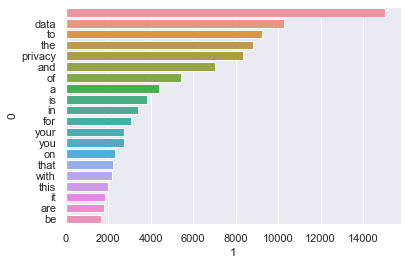

In [31]:
sns.barplot(data = freq_data, x = 1, y = 0);